# Model Training Analysis

This notebook analyzes the training process and performance of the MNIST MLP classifier.

In [1]:
import sys
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('.', '..')))

from src.data_preprocessing import load_and_preprocess_data

## Load the Trained Model and Data

In [3]:
model = joblib.load('../mnist_mlp_model.joblib')
_, X_test, _, y_test = load_and_preprocess_data(data_path="../data/mnist_784.npz")

Loaded MNIST data from local file.


## 1. Loss Curve

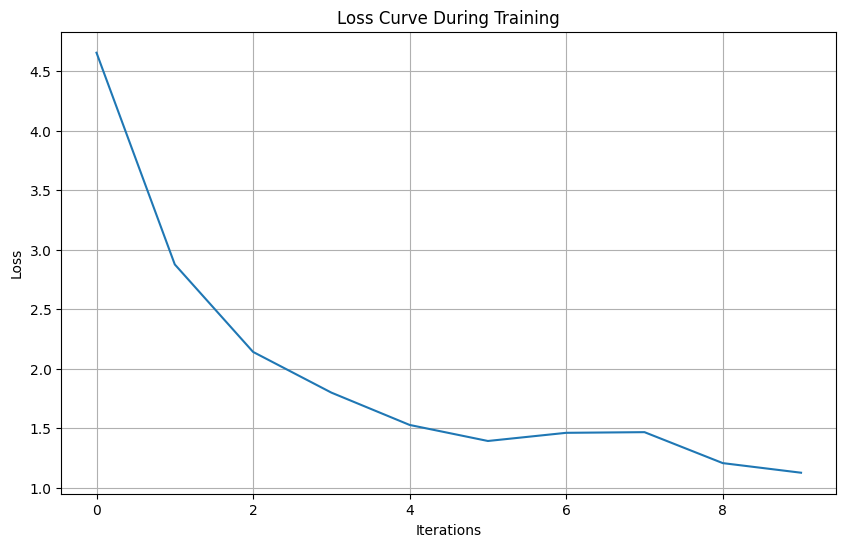

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_)
plt.title('Loss Curve During Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

The loss curve shows how the model's error changed over each iteration. A steadily decreasing curve is a good sign that the model is learning effectively.

## 2. Validation Scores

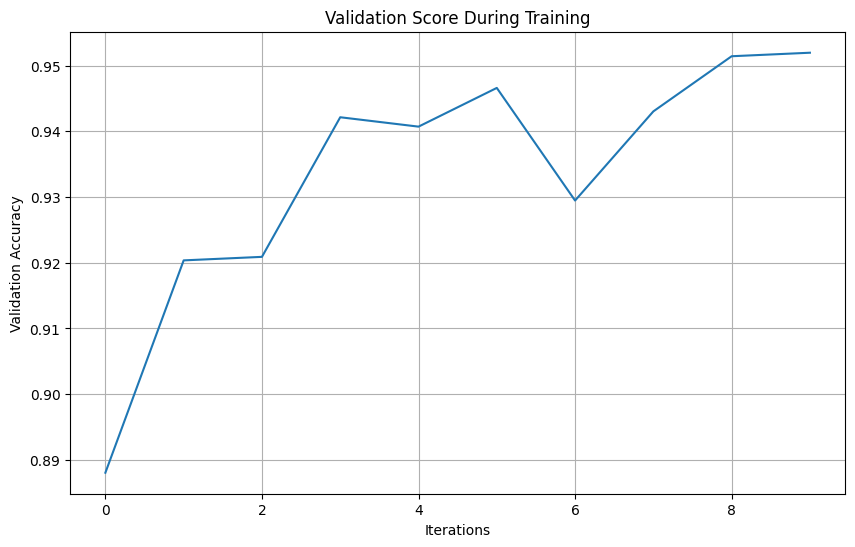

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(model.validation_scores_)
plt.title('Validation Score During Training')
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

This plot shows the model's accuracy on the validation set at each epoch. It helps to identify if the model is overfitting. If the validation score stops improving or starts to decrease, it's a sign of overfitting.

## 3. Classification Report

In [6]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.94      0.94      1380
           3       0.92      0.96      0.94      1433
           4       0.93      0.96      0.95      1295
           5       0.97      0.94      0.96      1273
           6       0.95      0.98      0.97      1396
           7       0.92      0.97      0.94      1503
           8       0.93      0.93      0.93      1357
           9       0.97      0.88      0.92      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



The classification report provides a detailed breakdown of the model's performance for each digit, including:
- **Precision:** The ability of the classifier not to label as positive a sample that is negative.
- **Recall:** The ability of the classifier to find all the positive samples.
- **F1-score:** A weighted average of precision and recall.

## 4. Confusion Matrix

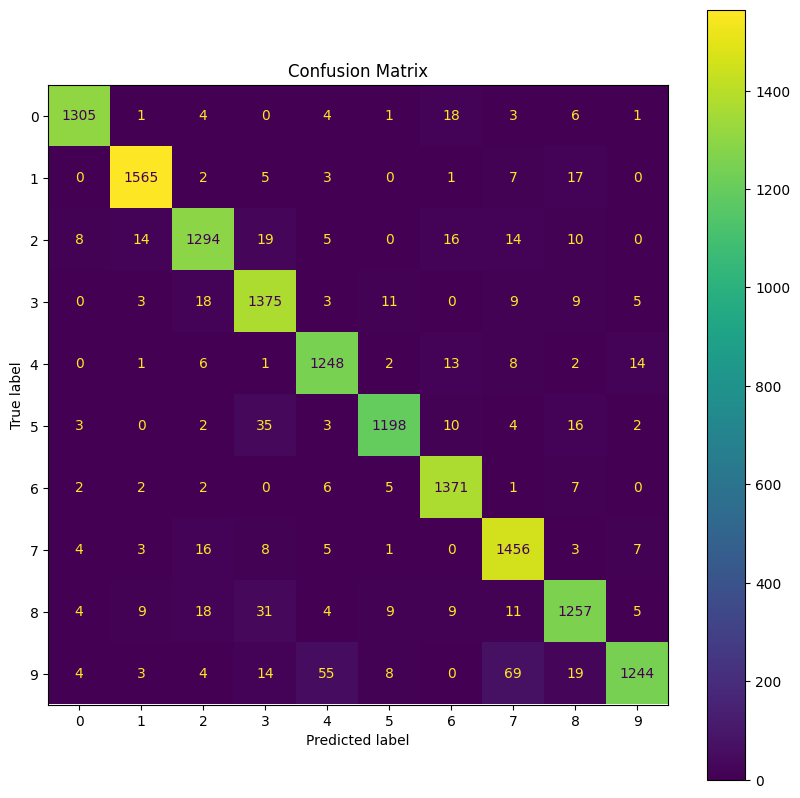

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

The confusion matrix visualizes the performance of the classification model. The diagonal elements show the number of correct predictions for each class, while the off-diagonal elements show where the model made mistakes.